# 任务二 统计分析

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 分析会员的年龄构成、男女比例等基本信息

### 会员年龄组成

In [14]:
mb = pd.read_csv('mb.csv')
mb2 = pd.read_csv('task1.csv')

In [5]:
mb['csrq'] = pd.to_datetime(mb['csrq'])
mb2['csrq'] = pd.to_datetime(mb2['csrq'])
mb['djsj'] = pd.to_datetime(mb['djsj'])

NameError: name 'mb' is not defined

In [12]:
mb['age'] = mb['csrq'].apply(lambda x: 2020 - x.year)

In [21]:
mb['age_lab'] = pd.cut(mb['age'],bins = [17,45,60,99],labels = ['青年','中年','老年'])
mb.head()

,kh,csrq,xb,djsj,age,age_lab
0,c68b20b4,2002-11-02,0.0,2013-05-11 00:00:00.000,18,青年
1,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,53,中年
2,2ab88539,1982-06-01,0.0,2010-11-19 00:00:00.000,38,青年
3,b4c77269,1964-02-05,0.0,2007-12-14 00:00:00.000,56,中年
4,83a91070,1968-06-18,1.0,2004-05-01 16:50:13.950,52,中年


(array([3.5000e+01, 1.1200e+02, 2.6030e+03, 1.3512e+04, 2.8759e+04,
        2.2517e+04, 2.6594e+04, 1.8621e+04, 1.5191e+04, 5.5230e+03,
        2.7930e+03, 6.6100e+02, 2.5900e+02, 7.0000e+01, 1.7000e+01,
        1.4000e+01, 1.9000e+01, 2.0000e+00, 4.0000e+00, 1.8000e+01]),
 array([ 10. ,  15.5,  21. ,  26.5,  32. ,  37.5,  43. ,  48.5,  54. ,
         59.5,  65. ,  70.5,  76. ,  81.5,  87. ,  92.5,  98. , 103.5,
        109. , 114.5, 120. ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, '年龄')

Text(0, 0.5, '个数')

Text(0.5, 1.0, '会员年龄构成')

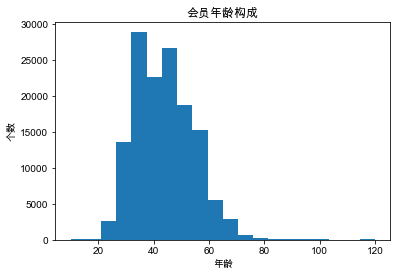

In [39]:
plt.hist(mb['age'],bins = 20)
plt.xlabel('年龄')
plt.ylabel('个数')
plt.title('会员年龄构成')
plt.show()

([<matplotlib.patches.Wedge at 0x11a6ea710>,
 [Text(-0.3260124030452589, 1.1548661883788338, '青年'),
  Text(0.10727364784222031, -1.1951955339937577, '中年'),
  Text(1.1793862086893738, -0.2214682161243574, '老年')],
 [Text(-0.19017390177640103, 0.6736719432209863, '58.76%'),
  Text(0.0625762945746285, -0.6971973948296919, '35.33%'),
  Text(0.6879752884021346, -0.12918979273920847, '5.91%')])

Text(0.5, 1.0, '会员年龄构成')

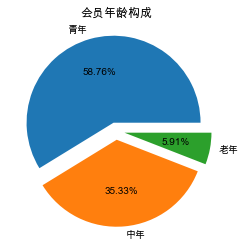

In [44]:
plt.pie(age_labs,labels = ['青年','中年','老年'],autopct = '%1.2f%%',explode = (0.1,0.1,0.1))
plt.title('会员年龄构成')
plt.show()

In [35]:
mb2['age'] = mb2['csrq'].apply(lambda x: 2020 - x.year)
mb2['age_lab'] = pd.cut(mb2['age'],bins = [17,45,60,99],labels = ['青年','中年','老年'])
age_labs = [np.sum(mb2['age_lab'] == '青年'),
            np.sum(mb2['age_lab'] == '中年'),
            np.sum(mb2['age_lab'] == '老年')]

In [36]:
age_pay = [ np.sum(mb2[mb2['age_lab'] == '青年']['je']),
            np.sum(mb2[mb2['age_lab'] == '中年']['je']),
            np.sum(mb2[mb2['age_lab'] == '老年']['je']),]

<BarContainer object of 3 artists>

Text(0.5, 0, '年龄分布')

Text(0, 0.5, '消费总额')

([<matplotlib.axis.XTick at 0x119c37f90>,
 <a list of 3 Text xticklabel objects>)

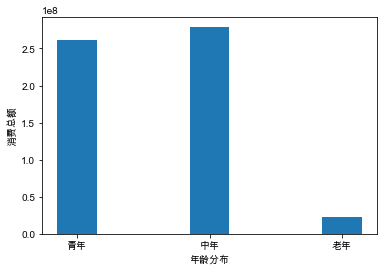

In [37]:
plt.bar(range(3), age_pay, width = 0.3)
plt.xlabel('年龄分布')
plt.ylabel('消费总额')
plt.xticks(range(3), ['青年','中年','老年'])
plt.show()

### 会员男女比例

In [12]:
sex_labs = [np.sum(mb['xb'] == 0),
            np.sum(mb['xb'] == 1)]

([<matplotlib.patches.Wedge at 0x1021e7710>,
 [Text(-0.9355937772741789, 0.7514414707253217, '女'),
  Text(0.8576276291679972, -0.6888213481648784, '男')],
 [Text(-0.5457630367432709, 0.4383408579231043, '78.46%'),
  Text(0.4677968886370893, -0.3757207353626609, '21.54%')])

Text(0.5, 1.0, '会员性别比例')

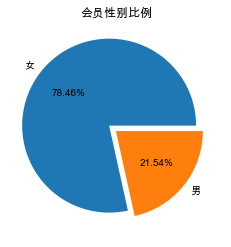

In [13]:
plt.pie(sex_labs,labels = ['女','男'],autopct = '%1.2f%%',explode = (0.1,0))
plt.title('会员性别比例')
plt.show()

In [33]:
pay_lab = [
        np.sum(mb2[mb2['xb'] == 0]['je']),
        np.sum(mb2[mb2['xb'] == 1]['je'])] 

<BarContainer object of 2 artists>

Text(0.5, 0, '性别')

Text(0, 0.5, '消费总额')

([<matplotlib.axis.XTick at 0x1173c9e10>,
 <a list of 2 Text xticklabel objects>)

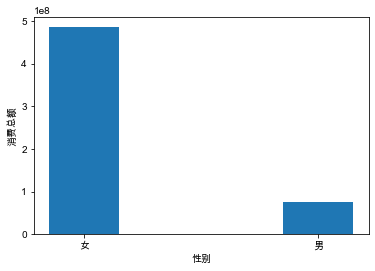

In [34]:
plt.bar(range(2), pay_lab, width = 0.3)
plt.xlabel('性别')
plt.ylabel('消费总额')
plt.xticks(range(2), ['女','男'])
plt.show()

## 分析会员的总订单占比、总消费金额占比等消费情况

### 会员与非会员的总订单占比

In [6]:
data = pd.read_csv('task1.csv')
data = data.dropna(axis = 0,subset = ['kh','djsj','dtime'])

/Users/quanzai/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
orders = [np.sum(data['kh'].notnull()),
         np.sum(data['kh'].isnull())]

([<matplotlib.patches.Wedge at 0x113bcae50>,
 [Text(0.03219226161314075, 1.149549328342299, '会员'),
  Text(-0.030792495115671215, -1.0995689256452055, '非会员')],
 [Text(0.018195626129166507, 0.6497452725412995, '49.11%'),
  Text(-0.01679590642672975, -0.5997648685337484, '50.89%')])

Text(0.5, 1.0, '会员与非会员总订单占比')

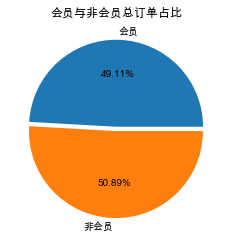

In [8]:
plt.pie(orders,labels = ['会员','非会员'],autopct = '%1.2f%%',explode = (0.05, 0))
plt.title('会员与非会员总订单占比')
plt.show()

### 会员的总消费金额占比

([<matplotlib.patches.Wedge at 0x121d99d90>,
 [Text(-0.30494604879920123, 1.1088317759343638, '会员'),
  Text(0.29168762424093486, -1.0606216714100647, '非会员')],
 [Text(-0.17236081019085286, 0.6267310037889882, '58.54%'),
  Text(0.15910234049505537, -0.5785209116782171, '41.46%')])

Text(0.5, 1.0, '会员与非会员消费金额占比')

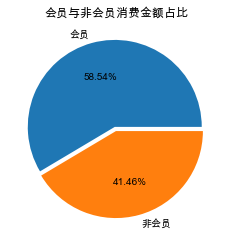

In [62]:
cost = [np.sum(data[data['kh'].notnull() == True]['je']),
         np.sum(data[data['kh'].notnull() == False]['je'])]
plt.pie(cost,labels = ['会员','非会员'],autopct = '%1.2f%%',explode = (0.05,0))
plt.title('会员与非会员消费金额占比')
plt.show()

### 不同年份的会员消费金额

In [7]:
data = pd.read_csv('mb_sell.csv')
data['dtime'] = pd.to_datetime(data['dtime'])

<BarContainer object of 4 artists>

Text(0.5, 0, '年份')

Text(0, 0.5, '消费总额')

([<matplotlib.axis.XTick at 0x125533790>,
 <a list of 4 Text xticklabel objects>)

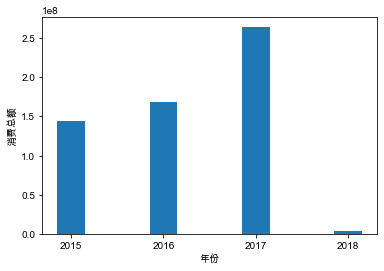

In [8]:
year_cost = []
for i in range(2015,2019):
    year_cost.append(data[data['dtime'].dt.year == i]['je'].sum())
plt.bar(range(4), year_cost, width = 0.3)
plt.xlabel('年份')
plt.ylabel('消费总额')
plt.xticks(range(4), ['2015','2016','2017','2018'])
plt.show()

Text(0.5, 1.0, '2015年各月消费总额')

Text(0.5, 0, '月份')

Text(0, 0.5, '消费金额')

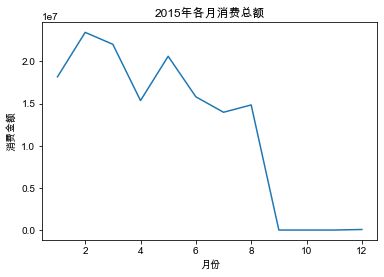

Text(0.5, 1.0, '2016年各月消费总额')

Text(0.5, 0, '月份')

Text(0, 0.5, '消费金额')

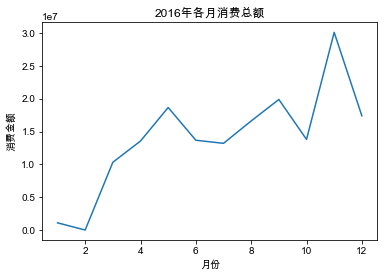

Text(0.5, 1.0, '2017年各月消费总额')

Text(0.5, 0, '月份')

Text(0, 0.5, '消费金额')

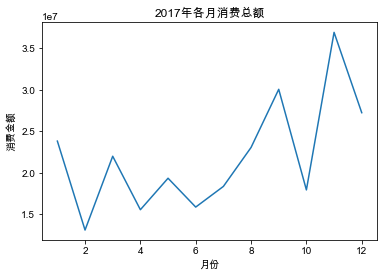

Text(0.5, 1.0, '2018年各月消费总额')

Text(0.5, 0, '月份')

Text(0, 0.5, '消费金额')

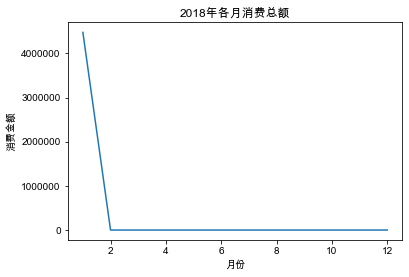

In [9]:
for i in range(2015, 2019):
    mon_cost = []
    for j in range(1,13):
        mon_cost.append(data[(data['dtime'].dt.year == i) & 
                                      (data['dtime'].dt.month == j)]['je'].sum())
    plt.plot(range(1,1+len(mon_cost)), mon_cost)
    plt.title(str(i) + "年各月消费总额")
    plt.xlabel("月份")
    plt.ylabel("消费金额")
    plt.show()

## 分析以季度和小时为单位，分析不同时间段会员的消费时间偏好

### 会员各季度总消费情况分析

In [10]:
data.isnull().sum()

kh          0
csrq        0
xb       1603
djsj        0
dtime       0
spbm        0
sl          0
sj          0
je          0
spmc        0
jf          0
syjh        0
djh         0
gzbm        0
gzmc     6943
dtype: int64

In [32]:
data['dtime'] = pd.to_datetime(data['dtime'])

In [33]:
import datetime as dt

In [34]:
data['month'] = data['dtime'].dt.month.replace(12,0)

In [12]:
data['quarter'] = pd.cut(data['dtime'].dt.month,bins=[0,2,5,8,11],labels = ['冬季','春季','夏季','秋季'])
data.head()

,kh,csrq,xb,djsj,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc,quarter
0,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,297.07,499.0,297.07,WMF D无,297.07,101.0,7cd8,7296.0,WMF 柜,秋季
1,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,11089.93,12288.0,11089.93,WMF D无,11089.93,101.0,7cd8,7296.0,WMF 柜,秋季
2,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2017-02-28 17:17:35.533,252403ef,598.00,598.0,598.00,双立人商品 F无,598.00,102.0,ed0a,7242.0,双立人柜,冬季
3,34c2dc93,1986-07-18,0.0,2007-04-19 00:00:00.000,2017-11-13 13:36:45.656,4708e0bb,260.00,260.0,260.00,植村秀三色眼影/眼线液/眉笔.,260.00,97.0,c3f4,8156.0,Shu Uemura,秋季
4,828aa9b4,1951-12-29,0.0,2004-09-24 16:39:08.716,2017-05-17 11:30:39.080,a4809307,1288.00,1288.0,1288.00,酷彩F件,1288.00,102.0,95b0,7300.0,Le Creuset(酷彩),春季


In [13]:
quarter_labs = [np.sum(data['quarter'] == '春季'),
                np.sum(data['quarter'] == '夏季'),
                np.sum(data['quarter'] == '秋季'),
                np.sum(data['quarter'] == '冬季')]

([<matplotlib.patches.Wedge at 0x11fc98190>,
 [Text(0.6423987994663041, 1.013569821198447, '春季'),
  Text(-1.167421369175363, 0.2777181067066405, '夏季'),
  Text(-0.17957003047514114, -1.1864883497764136, '秋季'),
  Text(1.0635293312114857, -0.5557925527144548, '冬季')],
 [Text(0.3747326330220107, 0.5912490623657606, '32.02%'),
  Text(-0.6809957986856284, 0.16200222891220692, '28.53%'),
  Text(-0.10474918444383231, -0.6921182040362411, '24.12%'),
  Text(0.6203921098733667, -0.32421232241676523, '15.33%')])

Text(0.5, 1.0, '各季度消费订单占比')

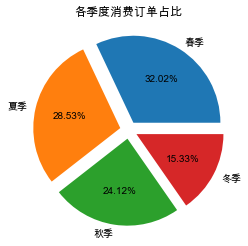

In [14]:
plt.pie(quarter_labs,labels = ['春季','夏季','秋季','冬季'],autopct = '%1.2f%%',explode = (0.1,0.1,0.1,0.1))
plt.title('各季度消费订单占比')
plt.show()

### 会员一天时间段消费情况分析

In [45]:
data['dtime'].dt.hour.describe()

count    1.893532e+06
mean     1.585531e+01
std      3.180566e+00
min      0.000000e+00
25%      1.300000e+01
50%      1.600000e+01
75%      1.800000e+01
max      2.300000e+01
Name: dtime, dtype: float64

In [15]:
data['time_lab'] = pd.cut(data['dtime'].dt.hour,
                          bins=[0,5,11,13,17,24],labels = ['凌晨','早上','中午','下午','晚上'])

In [16]:
time_labs = [np.sum(data['time_lab'] == '凌晨'),
             np.sum(data['time_lab'] == '早上'),
             np.sum(data['time_lab'] == '中午'),
                np.sum(data['time_lab'] == '下午'),
                np.sum(data['time_lab'] == '晚上')]

([<matplotlib.patches.Wedge at 0x121fc85d0>,
 [Text(1.1999999557110574, 0.00032602677859891146, '凌晨'),
  Text(1.1317835216992884, 0.3988308664207882, '早上'),
  Text(0.42152441382385347, 1.1235288908392418, '中午'),
  Text(-1.196738847129029, 0.08840888966773991, '下午'),
  Text(0.7008692659747218, -0.9740545528932427, '晚上')],
 [Text(0.6999999741647834, 0.00019018228751603168, '0.01%'),
  Text(0.6602070543245849, 0.23265133874545973, '10.77%'),
  Text(0.24588924139724783, 0.6553918529895577, '17.02%'),
  Text(-0.6980976608252669, 0.05157185230618161, '42.05%'),
  Text(0.408840405151921, -0.5681984891877248, '30.15%')])

Text(0.5, 1.0, '会员一天时间段消费订单数占比')

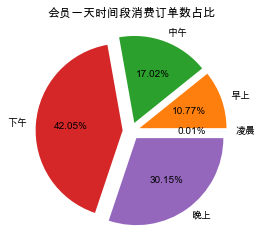

In [17]:
plt.pie(time_labs,labels = ['凌晨','早上','中午','下午','晚上'],
        autopct = '%1.2f%%',explode = (0.1,0.1,0.1,0.1,0.1))
plt.title('会员一天时间段消费订单数占比')
plt.show()